# Fitzhugh-Nagumo model

In [1]:
import solver

# Define Fitzhugh-Nagumo model
def fitzhugh_nagumo(x, y):
    alpha = 0.1
    gamma = 0.5
    epsilon = 0.01
    eq1 = (y[0] * (1 - y[0]) * (y[0] - alpha) - y[1] + 0.026) / epsilon
    eq2 = y[0] - gamma * y[1]

    return [eq1, eq2]

# Solution plot with numerous numerical method

Euler's explicit method

In [2]:
# Define initialisation value for numerical method
x_min = 0
x_max = 1
initial_value = [0.01, 0.01]
mesh_points = 100

problem = solver.OneStepMethods(
    fitzhugh_nagumo, x_min, x_max, initial_value, mesh_points)

# Solve with Euler's explicit method
mesh, soln = problem.Euler_explicit()

Solution plot

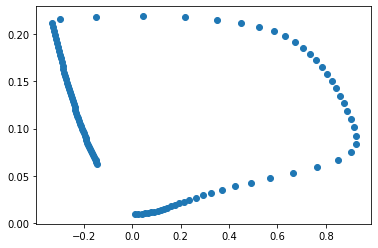

In [3]:
import matplotlib.pyplot as plt

v = []
w = []
for i in range(len(soln)):
    v.append(soln[i][0])
    w.append(soln[i][1])

plt.figure()
plt.scatter(v,w)
plt.show()

Four stage Runge-Kutta method

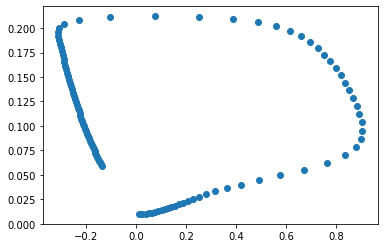

In [4]:
problem = solver.OneStepMethods(
    fitzhugh_nagumo, x_min, x_max, initial_value, mesh_points)

# Solve with four-stage Runge-Kutta method
mesh, soln = problem.RungeKutta4()

v = []
w = []
for i in range(len(soln)):
    v.append(soln[i][0])
    w.append(soln[i][1])

plt.figure()
plt.scatter(v,w)
plt.show()

Predictor-corrector method, Euler-trapezium method

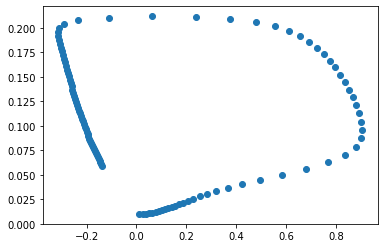

In [5]:
problem = solver.PredictorCorrector(
    fitzhugh_nagumo, x_min, x_max, initial_value, mesh_points)

# Solve with predictor-corrector method
# Predictor: Euler's explicit method
# Corrector: Trapezium rule method
mesh, soln = problem.Euler_trapezium()

v = []
w = []
for i in range(len(soln)):
    v.append(soln[i][0])
    w.append(soln[i][1])

plt.figure()
plt.scatter(v,w)
plt.show()

Adaptive method - ODE23 method (similar to Matlab ode23 method)

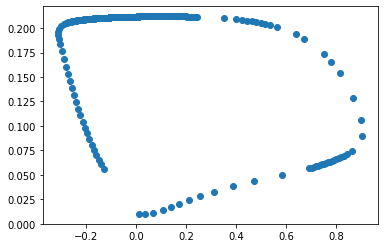

In [6]:
problem = solver.AdaptiveMethod(
    fitzhugh_nagumo, x_min, x_max, initial_value, initial_mesh=0.1)

# Solve with adaptive method, BS23 algorithm
mesh, soln = problem.ode23()

v = []
w = []
for i in range(len(soln)):
    v.append(soln[i][0])
    w.append(soln[i][1])

plt.figure()
plt.scatter(v,w)
plt.show()

Adaptive method - ODE45 method (similar to Matlab ode45 method)

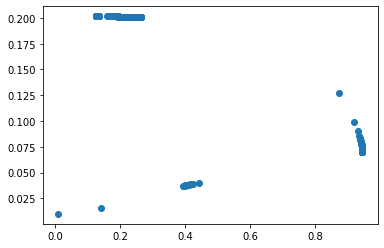

In [7]:
# Define initialisation value for ode45 numerical method
x_min = 0
x_max = 0.43
initial_value = [0.01, 0.01]

problem = solver.AdaptiveMethod(
    fitzhugh_nagumo, x_min, x_max, initial_value, initial_mesh=0.1)

# Solve with adaptive method, Runge-Kutta 45 method
mesh, soln = problem.ode45(abs_tol=0.5, rel_tol=1e-1)

v = []
w = []
for i in range(len(soln)):
    v.append(soln[i][0])
    w.append(soln[i][1])

plt.figure()
plt.scatter(v,w)
plt.show()